In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
data=pd.read_csv('mnist_784_csv.csv')
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [6]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
print("Shape of X_train:",x_train.shape)
print("Shape of X_test:",x_test.shape)

Shape of X_train: (56000, 784)
Shape of X_test: (14000, 784)


In [9]:
x_train = x_train.values.reshape(-1, 28, 28)
x_test = x_test.values.reshape(-1, 28, 28)

Visualization of image is:



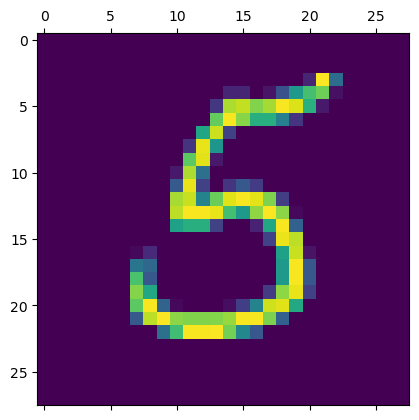

In [10]:
print("Visualization of image is:\n")
plt.matshow(x_train[0])

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')    
])

C:\Users\Nanda Kisore Biswas\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(
    metrics=['accuracy'],
    loss='sparse_categorical_crossentropy',
    optimizer='sgd'
)

In [14]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7256 - loss: 1.0651 - val_accuracy: 0.8946 - val_loss: 0.3791
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8989 - loss: 0.3623 - val_accuracy: 0.9134 - val_loss: 0.3115
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9151 - loss: 0.2990 - val_accuracy: 0.9213 - val_loss: 0.2814
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9249 - loss: 0.2653 - val_accuracy: 0.9316 - val_loss: 0.2543
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9330 - loss: 0.2384 - val_accuracy: 0.9364 - val_loss: 0.2361
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9366 - loss: 0.2242 - val_accuracy: 0.9406 - val_loss: 0.2211
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9423 - loss: 0.2039 - val_accuracy: 0.9428 - val_loss: 0.2086
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9458 - loss: 0

In [15]:
loss,accuracy=model.evaluate(x_test,y_test)
print("Loss is:",loss)
print("Accuracy is:",accuracy)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9497 - loss: 0.1764
Loss is: 0.1802285611629486
Accuracy is: 0.9498571157455444


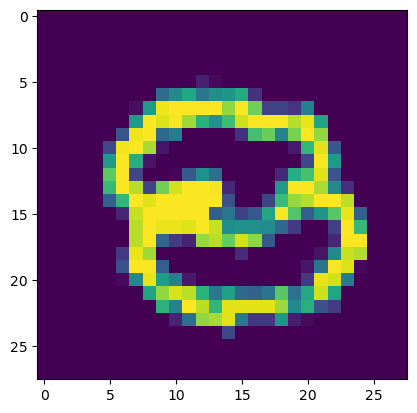

In [16]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [17]:
predicted_val=model.predict(x_test)
print("Predicted value is:{}".format(np.argmax(predicted_val[n])))

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Predicted value is:8


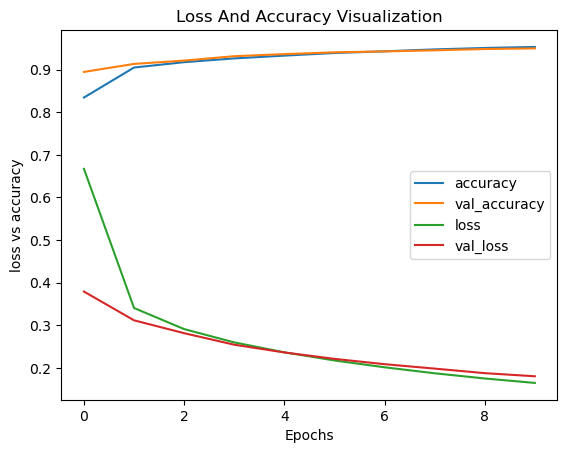

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss And Accuracy Visualization")
plt.xlabel("Epochs")
plt.ylabel("loss vs accuracy")
plt.legend(["accuracy","val_accuracy","loss","val_loss"])
plt.show()